In [1]:
import healpy as hp
import numpy as np

In [2]:
from astropy.io import fits

In [5]:
from pixell import enmap,utils

In [18]:
from pixell import reproject
import matplotlib.pyplot as plt

In [49]:
lensedalm=fits.open("../websky/lensed_alm.fits")

In [56]:
tsz = hp.read_map("../websky/tsz_8192.fits")
f_150 = -2.7685e6
tsz_150 = f_150*tsz
alm = hp.read_alm("../websky/lensed_alm.fits")
m = hp.alm2map(alm, 4096*2)
tot = tsz_150+m

In [61]:
hp.write_map("tot.fits",tot)

setting the output map dtype to [dtype('float64')]


In [62]:
test = hp.read_map("tot.fits")

In [66]:
np.sum(tot-test)

0.0

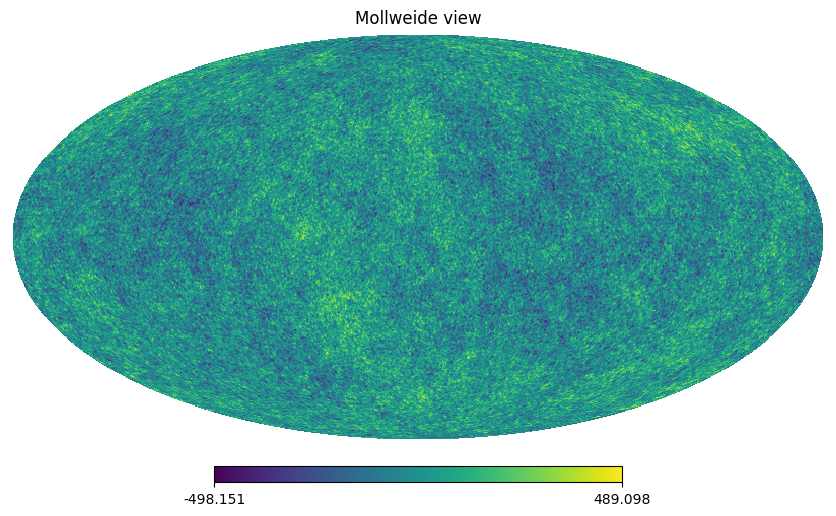

In [65]:
hp.mollview(tot)

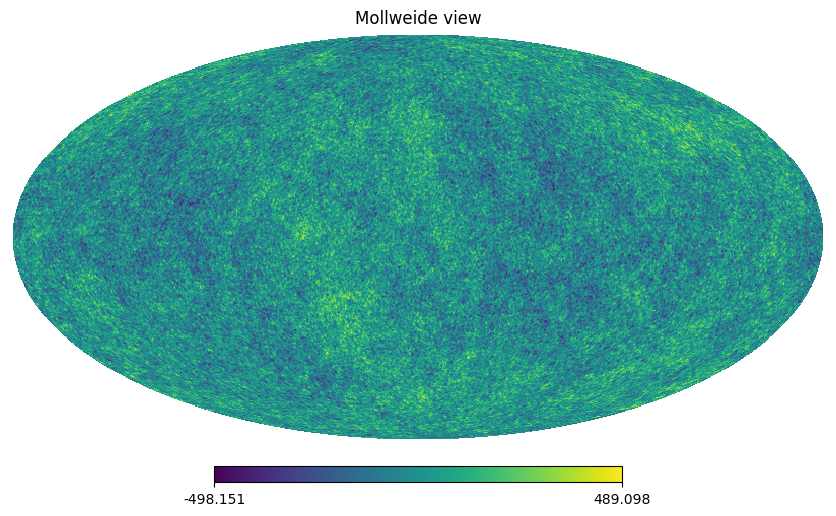

In [64]:
hp.mollview(test)

In [55]:
alm = hp.read_alm("../websky/lensed_alm.fits")
m = hp.alm2map(alm, 4096*2)

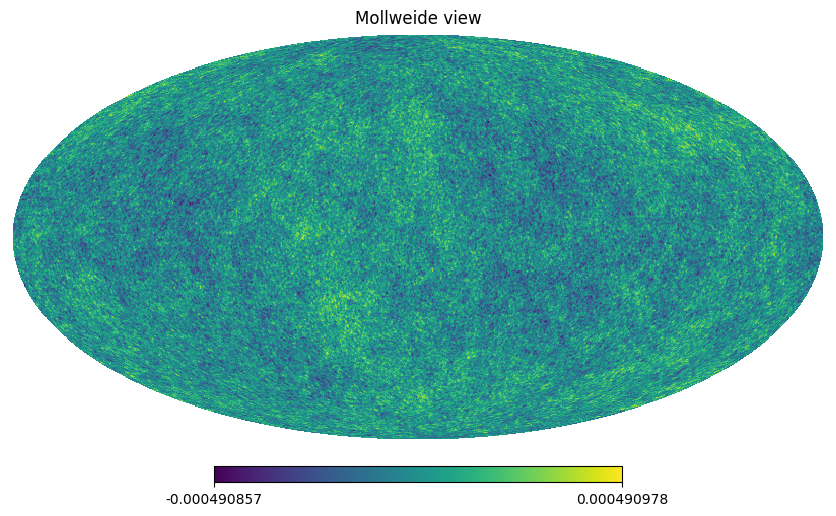

In [53]:
hp.mollview(m)

In [28]:
d[2000]

(4002001, -0.000641448682559137, 0.0)

In [13]:
!export OMP_NUM_THREADS=128

In [19]:
import astropy.table as table

In [3]:
from astropy.io import fits
fits_table_filename = '../websky/halos.fits'

hdul = fits.open(fits_table_filename)  # open a FITS file
data = hdul[1].data 

In [25]:
import astropy.units as u

In [26]:
ra = data["RADeg"][:3]*u.degree

In [11]:
type(data["name"][0])

str

In [12]:
x = np.arange(64)
y = np.arange(64)
x,y = np.meshgrid(x,y)

In [14]:
x.tolist()

[[0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  

In [14]:
res = np.deg2rad(1.5 / 60.)
shape, wcs = enmap.fullsky_geometry(res=res)
map_hp = hp.read_map("../websky/kap.fits").astype(np.float32)
pmap = reproject.healpix2map(map_hp, shape=shape, wcs=wcs)

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [28]:
f=open('../websky/halos.pksc')
N=np.fromfile(f,count=3,dtype=np.int32)[0]
catalog = np.fromfile(f,count=N*10,dtype=np.float32)
catalog = np.reshape(catalog,(N,10))
x  = catalog[:10,0];  y = catalog[:10,1];  z = catalog[:10,2] # Mpc (comoving)
theta,pi = hp.vec2ang(np.column_stack((x,y,z))) #radians
nside=4096
pix = hp.vec2pix(nside, x, y, z)

In [29]:
pix

array([120704925, 168108697,   3682315, 124604954,  75662565,  71601835,
        16026765, 113865868,  94648628, 112171182])

In [31]:
kappa_websky[pix[0]]

1.2156128

In [15]:
kappa_hp = hp.read_map("../websky/kap.fits")

In [18]:
fits.open("../websky/kap.fits")[1].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 4096 / length of dimension 1                          
NAXIS2  =               196608 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    1 / number of table fields                         
TTYPE1  = 'T       '                                                            
TFORM1  = '1024E   '                                                            
PIXTYPE = 'HEALPIX '           / HEALPIX pixelisation                           
ORDERING= 'RING    '           / Pixel ordering scheme, either RING or NESTED   
EXTNAME = 'xtension'        

In [ ]:
pmap = reproject.enmap_from_healpix("../websky/kap.fits", smap.shape, smap.wcs, ncomp=1, unit=1, lmax=6000,rot="gal,equ")


In [40]:
hp.mollview(kappa_hp)

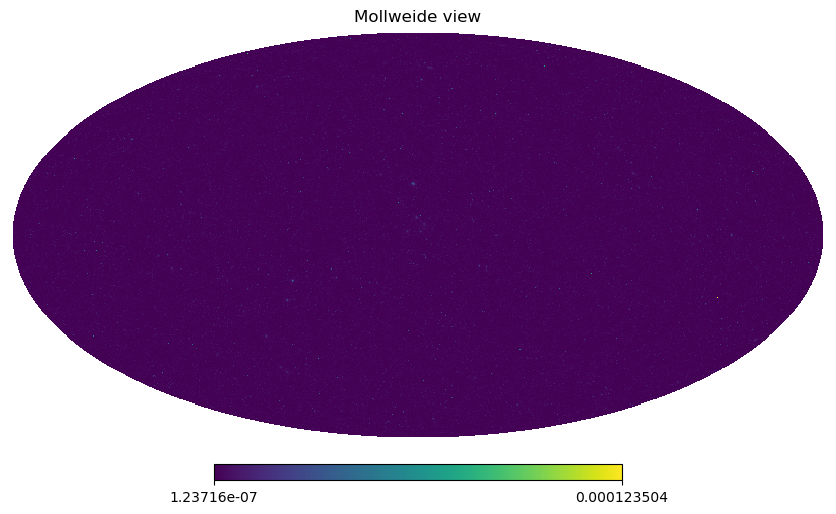

In [22]:
hp.mollview(tsz)